# Advanced Topics in Machine Learning

## Introduction

We are diving into some foundational and practical topics that are essential for becoming confident with supervised learning. From improving model performance through cross-validation to understanding the statistical principles behind machine learning.

---

## Cross-Validation

**What is it?** Cross-validation is a method for testing a model's performance on unseen data by splitting the dataset into training and validation sets multiple times.

**Analogy**: Think of studying for a test using flashcards. You shuffle the cards and test yourself with different subsets, so you don’t memorize just the order.

### Example

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score,  train_test_split
from sklearn.datasets import make_regression, make_classification, load_iris
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [26]:
X, y = make_regression(n_samples=100, n_features=1, noise=10)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(np.array([[1]]))
print("Predictions for input [1]:", y_pred)
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)

Predictions for input [1]: [79.64256197]
Cross-validation scores: [0.96889919 0.9722049  0.97706884 0.96818671 0.97601152]


In [27]:
X

array([[-0.92826945],
       [ 0.1573615 ],
       [-0.67043157],
       [ 0.50242213],
       [ 1.96532751],
       [-0.26623753],
       [ 0.46911671],
       [ 0.43084024],
       [ 1.84680604],
       [ 1.27467734],
       [ 1.04020593],
       [-0.38506026],
       [ 0.73121549],
       [ 0.16276208],
       [-1.17134301],
       [-1.16889627],
       [ 0.35376278],
       [ 1.54920948],
       [-0.62907197],
       [ 0.73114553],
       [ 0.65253469],
       [ 2.51554621],
       [ 1.72541628],
       [ 1.73132058],
       [-0.09475337],
       [-0.04642037],
       [-0.55554673],
       [-0.35114069],
       [ 1.96282263],
       [ 0.25799699],
       [ 1.63811275],
       [ 0.22962793],
       [-0.28795222],
       [ 1.7208303 ],
       [-0.81077592],
       [ 0.86226302],
       [-0.70389465],
       [-0.74251435],
       [ 1.15458428],
       [-0.04802953],
       [-0.60378024],
       [-0.88202734],
       [-0.37829288],
       [ 0.36550673],
       [ 0.49179306],
       [-1

In [28]:
y

array([ -57.25705085,   -1.64553886,  -37.02675009,   34.08275228,
        136.2088617 ,  -19.6371931 ,   29.8165689 ,   29.33023774,
        142.45757988,   95.8949802 ,   84.41926754,  -14.49704187,
         52.52904726,   10.9924858 ,  -86.48031784,  -88.57784609,
         20.7201892 ,  104.75302674,  -50.55971452,   86.18474468,
         71.78150779,  190.39425971,  164.7991019 ,  123.24347537,
         -9.0703285 ,   13.25516867,  -46.63384606,   -9.91950879,
        169.4443643 ,    0.82878126,  118.14688639,   19.27712365,
        -45.18766547,  139.72839273,  -57.71971039,   79.97464019,
        -58.84886614,  -48.80165249,   82.43702982,   -6.47362869,
        -43.08904433,  -56.70570637,  -20.15511236,   44.45686027,
         17.88691684, -114.6222327 ,  -21.34385061,  -27.18041543,
         -0.4048813 ,  128.49256   ,  -23.58123077,  -20.67283294,
         53.09628822,   -6.60759636,  -22.57699577,  -39.21845702,
         74.29544279, -215.74683287,  160.22557442,   27.98069

### Transform to see perfomance diff

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

model.fit(X_scaled, y_scaled)

y_pred = model.predict(np.array([[1]]))
print("Predictions for input [1]:", y_pred)

scores = cross_val_score(model, X_scaled, y_scaled, cv=5)
print("Cross-validation scores:", scores)

X_scaled = sm.add_constant(X_scaled)
sm_model = sm.OLS(y_scaled, X_scaled).fit()

print("\n")
print("\n")
print(sm_model.summary())


Predictions for input [1]: [[0.98817655]]
Cross-validation scores: [0.96889919 0.9722049  0.97706884 0.96818671 0.97601152]




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4071.
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.26e-81
Time:                        21:11:17   Log-Likelihood:                 45.629
No. Observations:                 100   AIC:                            -87.26
Df Residuals:                      98   BIC:                            -82.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

**Explanation**:

- `cv=5` means the dataset is split into 5 folds.
- Each fold gets a turn as the validation set.
- Helps us assess performance more reliably.

---



## Statistical Learning Theory

Statistical learning is the backbone of machine learning. It helps answer: *How well can our model generalize to new data?*

### Key Concept: Risk Minimization

- **Empirical Risk**: Error on the training set.
  
$$
R(f) = \mathbb{E}_{(x,y)}[L(y, f(x))]
$$

- **Expected Risk**: Error on new, unseen data.
- We aim to minimize expected risk.
  
$$
\hat{R}(f) = \frac{1}{n} \sum_{i=1}^{n} L(y_i, f(x_i))
$$

---

Empirical Risk (Training Error): 2.8976666407056664
Expected Risk (Testing Error): 4.683447700878508


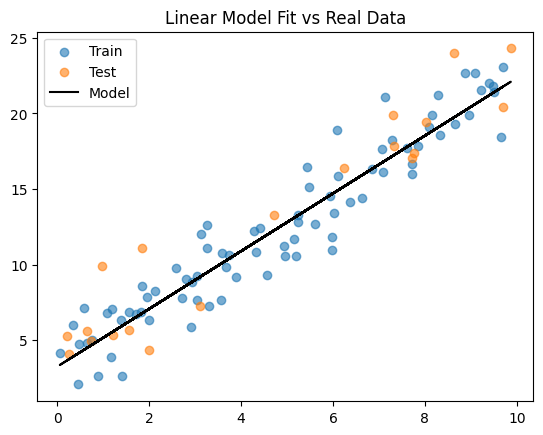

In [30]:

# Generate data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 points between 0 and 10
y = 2 * X.flatten() + 3 + np.random.randn(100) * 2  # Linear with noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate empirical and expected risk
empirical_risk = mean_squared_error(y_train, y_train_pred)
expected_risk = mean_squared_error(y_test, y_test_pred)

print("Empirical Risk (Training Error):", empirical_risk)
print("Expected Risk (Testing Error):", expected_risk)

# Plot
plt.scatter(X_train, y_train, label='Train', alpha=0.6)
plt.scatter(X_test, y_test, label='Test', alpha=0.6)
plt.plot(X, model.predict(X), color='black', label='Model')
plt.legend()
plt.title('Linear Model Fit vs Real Data')
plt.show()



## Bias-Variance Tradeoff

- **Bias**: Error due to overly simple models (e.g., linear model on curved data).
- **Variance**: Error due to overly complex models (model fits noise).

**Analogy**: Imagine trying to shoot arrows at a target.

- High bias = arrows far from the target.
- High variance = arrows scattered everywhere.
- Good model = tight cluster near the center.



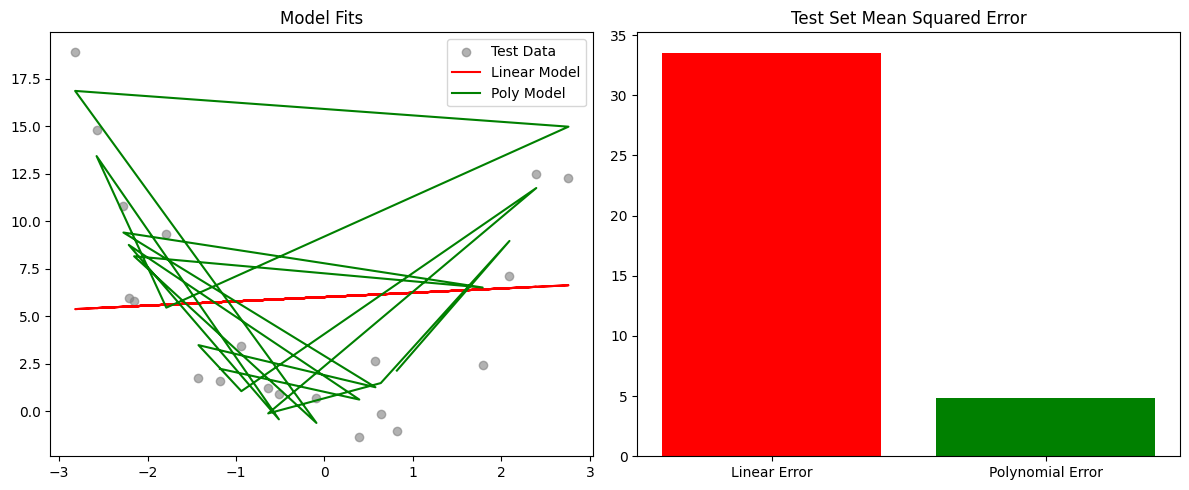

In [31]:
# Generate nonlinear data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X.flatten()**2 + np.random.randn(100) * 2  # Quadratic + noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear model (high bias)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Polynomial model (low bias, potentially high variance)
poly_features = PolynomialFeatures(degree=10)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Plotting
plt.figure(figsize=(12,5))

# Actual data
plt.subplot(1,2,1)
plt.scatter(X_test, y_test, label='Test Data', color='gray', alpha=0.6)
plt.plot(X_test, y_pred_lin, label='Linear Model', color='red')
plt.plot(X_test, y_pred_poly, label='Poly Model', color='green')
plt.title('Model Fits')
plt.legend()

# Errors
plt.subplot(1,2,2)
plt.bar(['Linear Error', 'Polynomial Error'],
        [mean_squared_error(y_test, y_pred_lin), mean_squared_error(y_test, y_pred_poly)],
        color=['red', 'green'])
plt.title('Test Set Mean Squared Error')
plt.tight_layout()
plt.show()


---

## Ridge and Lasso Regression

These are **regularized** versions of linear regression.

#### A Quick Recap: Linear Regression

**Mathematical Formula**:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

The goal is to **minimize the loss function** (Mean Squared Error):

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


### Ridge (L2 Penalty):

Penalizes large coefficients.

Formula:

$$
\text{Loss} = \text{MSE} + \lambda \sum w_i^2
$$

### Lasso (L1 Penalty):

Penalizes absolute values of coefficients and can shrink some to zero.

Formula:

$$
\text{Loss} = \text{MSE} + \lambda \sum |w_i|
$$

### Example

In [32]:

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X, y)
lasso.fit(X, y)

print("Ridge Coef:", ridge.coef_)
print("Lasso Coef:", lasso.coef_)

Ridge Coef: [0.04582782]
Lasso Coef: [0.01330429]


In [33]:
X, y  = make_regression(n_samples=100, n_features=5, noise=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

print("Ridge Coefficients:", model.coef_)

Ridge Coefficients: [47.48202765  8.15272008  4.02460779 18.83084592 55.19758518]


In [34]:
l_model = Lasso(alpha=0.1)
l_model.fit(X_train, y_train)

print("Lasso Coefficients:", l_model.coef_)

Lasso Coefficients: [47.86817528  8.21216359  4.06727682 18.97640216 55.96678076]


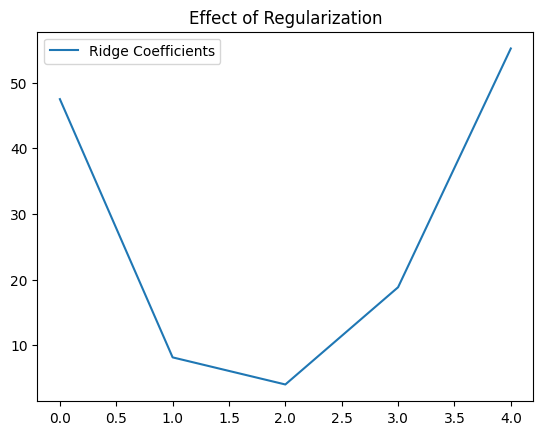

In [35]:
plt.plot(model.coef_, label="Ridge Coefficients")
plt.legend()
plt.title("Effect of Regularization")
plt.show()

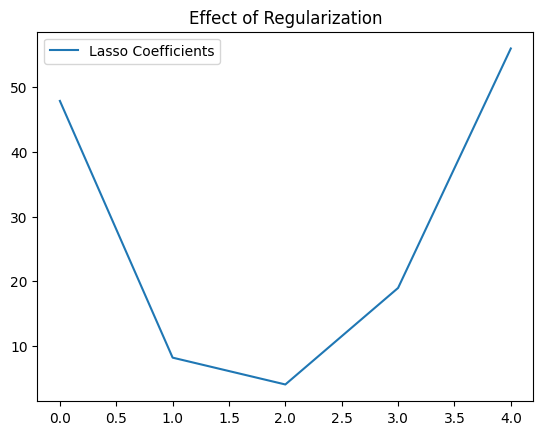

In [36]:
plt.plot(l_model.coef_, label="Lasso Coefficients")
plt.legend()
plt.title("Effect of Regularization")
plt.show()



|Model      | Keep All Features | Shrinks Coefficients |  Can Drop Features 
| ----------- | ----------- |----------- | ----------- |
| Linear Regression     | Yes      | No | No
| Ridge Regression | Yes | Yes | No 
| Lasso Regression | No | Yes | Yes


## RidgeCV and LassoCV

**RidgeCV** and **LassoCV** are versions of Ridge and Lasso regression that automatically select the best regularization parameter (alpha) using cross-validation.

- **RidgeCV**: Ridge regression with built-in cross-validation for alpha.
- **LassoCV**: Lasso regression with built-in cross-validation for alpha.

### Example:

In [37]:


# RidgeCV and LassoCV automatically select the best alpha using cross-validation
ridgecv = RidgeCV(alphas=[0.1, 1.0, 10.0, 2.0, 5.0], cv=5)
lassocv = LassoCV(alphas=[0.1, 1.0, 10.0, 2.0, 5.0], cv=5)

ridgecv.fit(X, y)
lassocv.fit(X, y)

print('Best alpha for RidgeCV:', ridgecv.alpha_)
print('Best alpha for LassoCV:', lassocv.alpha_)
print('RidgeCV Coef:', ridgecv.coef_)
print('LassoCV Coef:', lassocv.coef_)

Best alpha for RidgeCV: 1.0
Best alpha for LassoCV: 0.1
RidgeCV Coef: [47.63128264  7.34987705  3.60902619 18.78270327 54.47995921]
LassoCV Coef: [47.96155939  7.31429214  3.60526223 18.87382994 54.99730181]


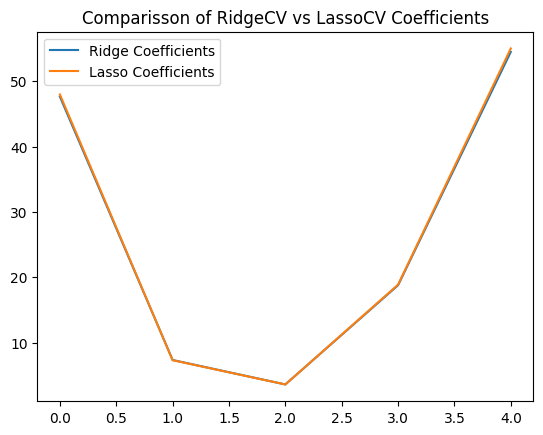

In [38]:
plt.plot(ridgecv.coef_, label="Ridge Coefficients")
plt.plot(lassocv.coef_, label="Lasso Coefficients")
plt.legend()
plt.title("Comparisson of RidgeCV vs LassoCV Coefficients")
plt.show()

**Explanation**:

- Regularization helps avoid overfitting.
- Lasso can help with feature selection by reducing some coefficients to 0.

| Scenario | Bias | Variance | Overfitting? | Underfitting? |
|--------- |--------- | --------- | --------- | --------- |
| No Regulariztion | Low | High | Yes | No |
| Heavy Regularization | High | Low | No | Yes|
| Balanced (Ridge/Lasso) | Medium | Medium| No | No | 



---

## Logistic Regression - Introduction

Used for classification tasks (e.g., spam or not).

### Logistic Function (Sigmoid):

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Maps any number to [0, 1].

### Example:

In [39]:
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))


---

## Logistic Regression in scikit-learn

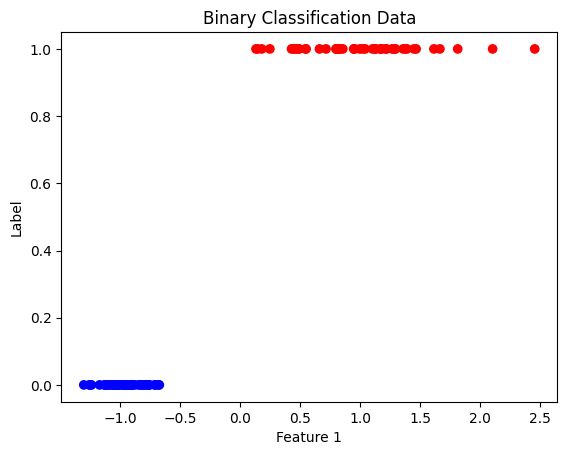

In [40]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], y , c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Label')
plt.title("Binary Classification Data")
plt.show()

In [41]:
X

array([[ 0.48240906,  0.47383292],
       [-0.71508153, -0.03471177],
       [ 1.28804649,  0.71400049],
       [ 0.94900079,  0.62566735],
       [ 1.29443245, -0.44651495],
       [ 1.27886873, -0.07282891],
       [-0.96132573,  0.17457781],
       [-1.05190674,  0.75193303],
       [-1.08204625, -0.34271452],
       [ 0.81987919, -0.68002472],
       [ 0.83542098,  0.05820872],
       [ 0.94604581,  0.21409374],
       [-0.67630562, -1.23086432],
       [-0.9234536 ,  0.06023021],
       [-0.78061289,  0.22745993],
       [-1.30595559,  0.47359243],
       [-1.10698389, -0.16128571],
       [ 1.37622267,  0.29307247],
       [ 0.99715802,  0.35778736],
       [ 0.79900835, -0.88951443],
       [ 2.10465976, -0.85715756],
       [ 0.46164225, -1.24573878],
       [-0.70878456,  0.34644821],
       [-1.02830627,  0.18463386],
       [ 1.13037986,  0.56078453],
       [ 0.24622298,  1.89679298],
       [ 1.26631756,  1.15859558],
       [ 1.46642399, -1.1913035 ],
       [-1.25157102,

In [42]:
y

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

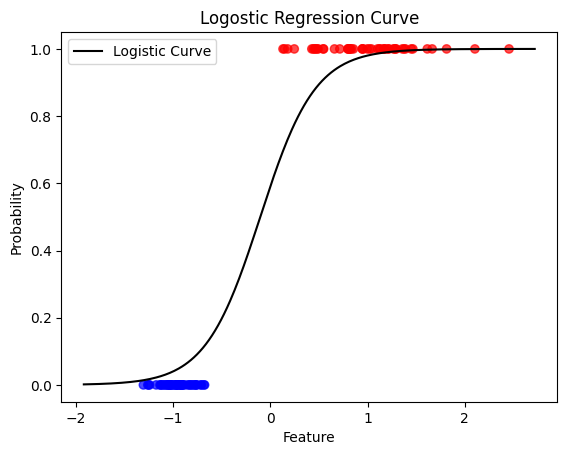

In [43]:
log_model = LogisticRegression()
log_model.fit(X, y)

X_new = np.column_stack((np.linspace(X.min(), X.max(), 300), np.zeros(300)))
probs = log_model.predict_proba(X_new)[:, 1]

plt.scatter(X[:, 0], y, c=y, cmap="bwr", alpha=0.7)
plt.plot(np.linspace(X.min(), X.max(), 300), probs, color='black', label='Logistic Curve')
plt.xlabel("Feature")
plt.ylabel("Probability")
plt.title("Logostic Regression Curve")
plt.legend()
plt.show()

**Explanation**:

- Trains a logistic regression model on data.
- Measures accuracy on unseen test data.

---



## MLE and Logistic Regression

**Maximum Likelihood Estimation (MLE)** helps find model parameters that maximize the likelihood of observed data.

In logistic regression, we choose coefficients that make our observed labels most probable given our input features.

### Mathematical View:

$$
\text{If } y_i \text{ is the label:}\quad L = \prod_{i=1}^{n} P(y_i|x_i; w) \\
\text{Take log, differentiate, and solve to find } w.
$$

---


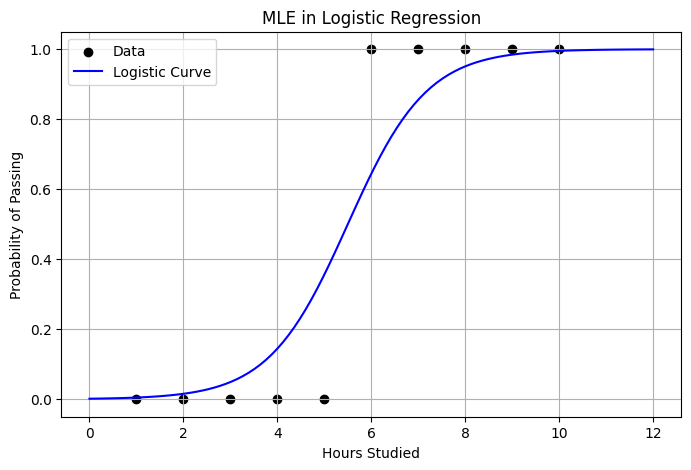

In [44]:

# Simple data: Hours Studied vs Pass/Fail
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # 0 = Fail, 1 = Pass

# Fit Logistic Regression
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities
x_test = np.linspace(0, 12, 100).reshape(-1, 1)
y_prob = model.predict_proba(x_test)[:, 1]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='black', label='Data')
plt.plot(x_test, y_prob, color='blue', label='Logistic Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('MLE in Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


## Gradient Descent

**What is it?** An optimization algorithm to minimize loss.

**Analogy**: Like walking downhill to find the lowest point.

$$
w = w - \alpha \cdot \frac{\partial J}{\partial w}
$$


### Example:

In [45]:
# Simple gradient descent on MSE
w = 0  # Initial weight
lr = 0.1  # Learning rate
X = np.array([1, 2, 3])
y = np.array([2, 4, 6])

for i in range(100):
    y_pred = w * X
    error = y - y_pred
    grad = -2 * (X * error).mean()
    w = w - lr * grad

print("Optimized weight:", w)

Optimized weight: 2.0


In [46]:
# Data 
X = np.array([[1], [2], [3]])
y = np.array([2,4,6])

model = LinearRegression()

#Fit the model
model.fit(X, y)

#Get the optimized weight (coeffiecient)

optimized_weight = model.coef_[0]

print("Optimized weight:", round(optimized_weight))


Optimized weight: 2


**Explanation**:

- Gradually updates `w` to minimize the mean squared error.


## KFold Cross-Validation

**KFold** is a cross-validation strategy that splits the data into K consecutive folds (subsets). Each fold is used once as a validation while the K-1 remaining folds form the training set.

- Useful for evaluating model performance more robustly.

### Example:

In [47]:
# KFold cross-validation with 5 splits
kf = KFold(n_splits=3, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Fold {fold+1}: Train indices {train_index}, Test indices {test_index}')

Fold 1: Train indices [1 2], Test indices [0]
Fold 2: Train indices [0 2], Test indices [1]
Fold 3: Train indices [0 1], Test indices [2]


## KMeans Clustering

**KMeans** is an unsupervised learning algorithm that groups data into a specified number of clusters based on feature similarity.

- Useful for finding patterns or groups in data without labels.

### Example:

In [48]:
# KMeans clustering with 3 clusters
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
print('Cluster labels:', labels)

Cluster labels: [0 0 0 0 0 0 1 1 1 1]



---

## Exercises

1. Implement 5-fold cross-validation for a classifier of your choice.
2. Train a Ridge and Lasso regression model and compare their coefficients.
3. Write a function to simulate gradient descent on any simple equation.
4. Explore the effect of regularization strength on model performance.
5. Train a logistic regression model and evaluate with accuracy and confusion matrix.

---

## Summary

- Cross-validation improves evaluation reliability.
- Statistical learning theory underpins ML algorithms.
- Bias-variance tradeoff helps balance model complexity.
- Ridge/Lasso combat overfitting.
- Logistic regression is great for binary classification.
- Gradient descent powers most ML training today.

Great job making it through this deep dive!

[Slides](https://docs.google.com/presentation/d/16TZezGvMSq1HvhXjLdETjm-TgXO3UVUkd7LaFwZa5H4/edit?usp=sharing)